In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import seaborn as sns

import pickle
import yellowbrick 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.callbacks import EarlyStopping

from keras import regularizers
from keras.layers import Dropout
from keras.layers import Dense 
from keras import Sequential

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
#import data
df=pd.read_pickle('./data/dummied_122.pkl')

In [3]:
#encode labels
le=LabelEncoder()
df.status_group = le.fit_transform(df.status_group)
from sklearn.preprocessing import StandardScaler 

In [8]:
# train,test,split
X =df.drop('status_group',axis=1)
y=df.status_group

In [9]:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.2, random_state=42,stratify=y)
print('Shapes')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape) 

Shapes
X_train: (44256, 148)
X_test: (11065, 148)
y_train: (44256,)
y_test: (11065,)


In [13]:
# Convert the y variable for neural net imput
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test)
y_train = np_utils.to_categorical(y_train)

In [10]:
y_test

51728    0
44817    0
54670    0
419      0
34574    0
57710    2
2797     2
14606    2
36137    2
40707    0
55760    2
43049    0
8648     0
28773    2
36090    0
5713     2
32920    0
25241    0
28647    0
52824    1
5126     2
56887    0
9466     2
7505     2
56167    0
6289     2
47056    2
3610     0
52323    0
44238    0
        ..
50577    2
39564    1
6597     2
7079     0
11006    0
8800     0
20618    2
55161    0
40040    0
59126    2
40625    2
27894    0
32663    0
42570    2
35661    1
58037    0
34338    0
2929     2
20900    0
28626    1
29797    0
4714     0
21129    2
12282    2
11414    0
55999    2
47008    0
19947    2
27208    0
36469    2
Name: status_group, Length: 11065, dtype: int64

In [11]:


#scale and transform the predictive dataset in both test and train forms
ss = StandardScaler()
X_train_s= ss.fit_transform(X_train) # saved the mean and std from X_train
X_test_s=ss.transform(X_test)

In [12]:
X_train_s.shape[1]

148

In [14]:
callbacks = [EarlyStopping(monitor='val_loss', patience=6)]
input_dim= X_train_s.shape[1]
output_dim= 3

model= Sequential()
model.add(Dense(122,input_dim=input_dim, activation='relu',
               kernel_regularizer=regularizers.l2(0.01)))
#Dropout layer 1
model.add(Dropout(0.5)) # Ben Shaver suggestion
model.add(Dense(80, activation='relu',
               kernel_regularizer=regularizers.l2(0.01)))
#Dropout layer 2
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu',
               kernel_regularizer=regularizers.l2(0.01)))
#Dropout layer 3
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu',
               kernel_regularizer=regularizers.l2(0.01)))
#Dropout layer 4
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu',
               kernel_regularizer=regularizers.l2(0.01)))
#Dropout layer 5
model.add(Dropout(0.5))
model.add(Dense(output_dim,activation='softmax'))

#Compile 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#fit
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=50, verbose=2,callbacks=callbacks,)

Train on 44256 samples, validate on 11065 samples
Epoch 1/50
 - 6s - loss: 3.8705 - acc: 0.4983 - val_loss: 2.0260 - val_acc: 0.5427
Epoch 2/50
 - 5s - loss: 1.7995 - acc: 0.5417 - val_loss: 1.5338 - val_acc: 0.5427
Epoch 3/50
 - 6s - loss: 1.3480 - acc: 0.5424 - val_loss: 1.1789 - val_acc: 0.5427
Epoch 4/50
 - 9s - loss: 1.0688 - acc: 0.5426 - val_loss: 0.9815 - val_acc: 0.5427
Epoch 5/50
 - 6s - loss: 0.9363 - acc: 0.5426 - val_loss: 0.9055 - val_acc: 0.5427
Epoch 6/50
 - 5s - loss: 0.8945 - acc: 0.5427 - val_loss: 0.8881 - val_acc: 0.5427
Epoch 7/50
 - 5s - loss: 0.8867 - acc: 0.5427 - val_loss: 0.8858 - val_acc: 0.5427
Epoch 8/50
 - 5s - loss: 0.8856 - acc: 0.5427 - val_loss: 0.8854 - val_acc: 0.5427
Epoch 9/50
 - 6s - loss: 0.8854 - acc: 0.5427 - val_loss: 0.8854 - val_acc: 0.5427
Epoch 10/50
 - 6s - loss: 0.8854 - acc: 0.5427 - val_loss: 0.8853 - val_acc: 0.5427
Epoch 11/50
 - 7s - loss: 0.8854 - acc: 0.5427 - val_loss: 0.8853 - val_acc: 0.5427
Epoch 12/50
 - 7s - loss: 0.8854 - 

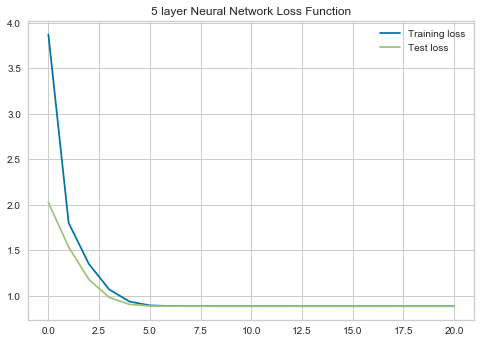

In [15]:
train_loss=history.history['loss']
test_loss=history.history['val_loss']
plt.plot(train_loss,label='Training loss')
plt.plot(test_loss,label='Test loss')
plt.title("5 layer Neural Network Loss Function")
plt.legend();